## Goal

See how much the $D_{JS}\left(P(p_i| a=0.0, V_0=10.0) || P(p_i || a=0.0, V_L ) \right)$ changes when $V_L = V_0 ( 1+ v(t))$ where $v$ is independently polled from a normal distribution of $\mu=0$, $\sigma$ for every RK4 time step. If the JSD changes too much for small values of $\sigma$, it implies our sequence may not be as robust to variations in laser power during the experimental sequence.

### Import

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import seaborn.objects as so;
import Units
sns.set_theme()


4.370911518037973


In [11]:
datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP.txt");
datafile_MP = np.loadtxt("../test_jitter_updated/jitter_MP.txt");

Text(0.5, 1.0, 'Jenson-Shannon Divergence of $P(V_0)$ and $P(V_L)$')

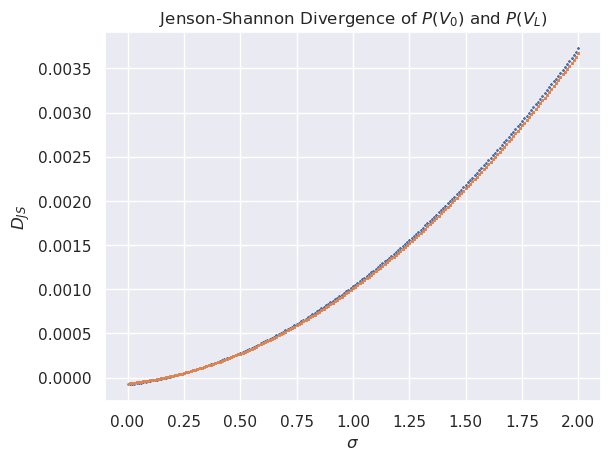

In [21]:
x= datafile_SP[:,0]; y= datafile_SP[:,1]
p =np.polyfit( x , y , 2 , rcond = None )

#plt.plot( x , y, 'x')
plt.plot( x, p[2]+ x*p[1]+x**2 *p[0],'x', markersize=1)

x= datafile_MP[:,0]; y= datafile_MP[:,1]
p =np.polyfit( x , y , 2 , rcond = None )

#plt.plot( x , y, 'x')
plt.plot( x, p[2]+ x*p[1]+x**2 *p[0], 'o', markersize=1)
plt.ylabel( '$D_{JS}$')
plt.xlabel('$\sigma$')
plt.title("Jenson-Shannon Divergence of $P(V_0)$ and $P(V_L)$")

In [5]:
p

array([-4.16497969e-04,  2.04558310e-03, -6.89324563e-04,  9.24590497e-05])

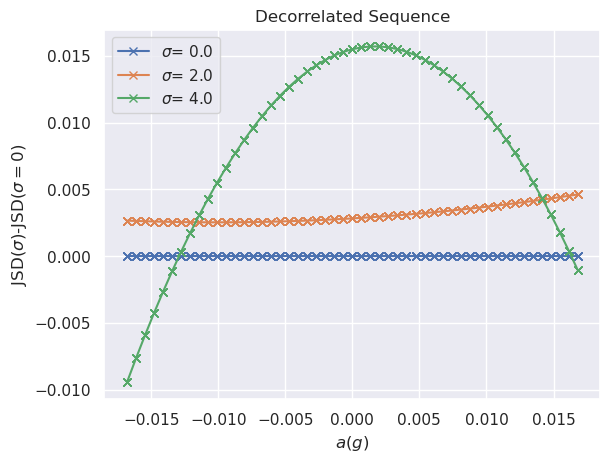

In [63]:
datafile_MP = np.loadtxt("../test_jitter_updated/jitter_MP_diagnostic.txt");
datanew  = datafile_MP[ np.lexsort((datafile_MP[:,2],datafile_MP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==0];
x0= data_select[:,2]*Units.accUnit/Units.g;
y0=data_select[:,1];
p0=np.polyfit(x0,y0,deg=2);
y0=p0[0]*x0**2+p0[1]*x0+p0[2];

for i in range( len(sigma) ):
    data_select=datanew[datanew[:,0]==sigma[i]];
    x=data_select[:,2]*Units.accUnit/Units.g; y= data_select[:,1];
    p=np.polyfit(x,y,deg=2)
    plt.plot(x, p[0]*x**2+p[1]*x+p[2]-y0,'x-',label="$\sigma$= "+str(sigma[i]));

plt.xlabel("$a(g)$"); plt.ylabel("JSD($\sigma$)-JSD($\sigma=0$)");
plt.title("Decorrelated Sequence");

# datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic.txt");
# datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

# sigma=np.unique(datanew[:,0])
# sigma=np.unique(datanew[:,0])
# for i in range( len(sigma) ):
#     data_select=datanew[datanew[:,0]==sigma[i]];
#     plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], 'x',label="SP + "+str(sigma[i]));

plt.legend()

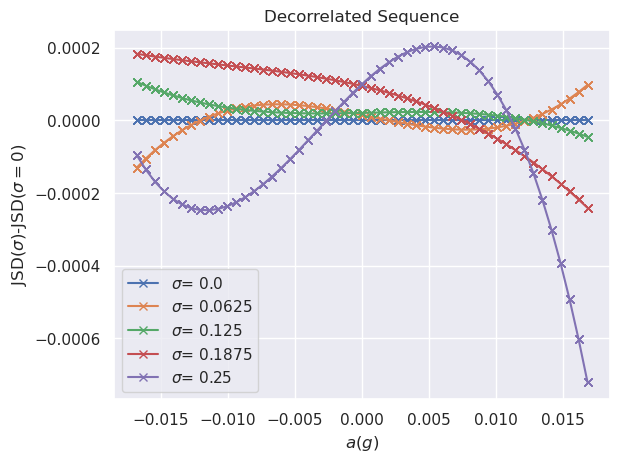

In [7]:
datafile_MP = np.loadtxt("../test_jitter_updated/jitter_MP_diagnostic4.txt");
datanew  = datafile_MP[ np.lexsort((datafile_MP[:,2],datafile_MP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==0];
x0= data_select[:,2]*Units.accUnit/Units.g;
y0=data_select[:,1];
p0=np.polyfit(x0,y0,deg=3);
y0=p0[0]*x0**3+p0[1]*x0**2+p0[2]*x0+p0[3];

for i in range( len(sigma) ):
    data_select=datanew[datanew[:,0]==sigma[i]];
    x=data_select[:,2]*Units.accUnit/Units.g; y= data_select[:,1];
    p=np.polyfit(x,y,deg=3)
    plt.plot(x, p[0]*x**3+p[1]*x**2+p[2]*x+p[3]-y0,'x-',label="$\sigma$= "+str(sigma[i]));

plt.xlabel("$a(g)$"); plt.ylabel("JSD($\sigma$)-JSD($\sigma=0$)");
plt.title("Decorrelated Sequence");

# datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic.txt");
# datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

# sigma=np.unique(datanew[:,0])
# sigma=np.unique(datanew[:,0])
# for i in range( len(sigma) ):
#     data_select=datanew[datanew[:,0]==sigma[i]];
#     plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], 'x',label="SP + "+str(sigma[i]));

plt.legend()

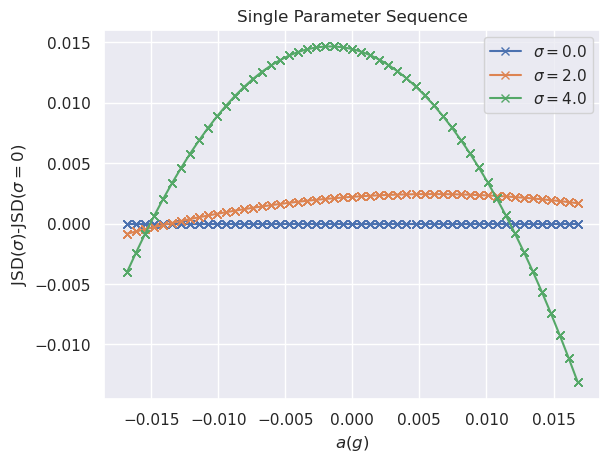

In [62]:
datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic.txt");
datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==0];
x0= data_select[:,2]*Units.accUnit/Units.g;
y0=data_select[:,1];
p0=np.polyfit(x0,y0,deg=2);
y0=p0[0]*x0**2+p0[1]*x0+p0[2];

for i in range( len(sigma) ):
    data_select=datanew[datanew[:,0]==sigma[i]];
    x=data_select[:,2]*Units.accUnit/Units.g; y= data_select[:,1];
    p=np.polyfit(x,y,deg=2)
    plt.plot(x, p[0]*x**2+p[1]*x+p[2]-y0,'x-',label="$\sigma=$"+str(sigma[i]));

plt.xlabel("$a(g)$"); plt.ylabel("JSD($\sigma$)-JSD($\sigma=0$)");
plt.title("Single Parameter Sequence");
# datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic.txt");
# datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

# sigma=np.unique(datanew[:,0])
# sigma=np.unique(datanew[:,0])
# for i in range( len(sigma) ):
#     data_select=datanew[datanew[:,0]==sigma[i]];
#     plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], 'x',label="SP + "+str(sigma[i]));

plt.legend()

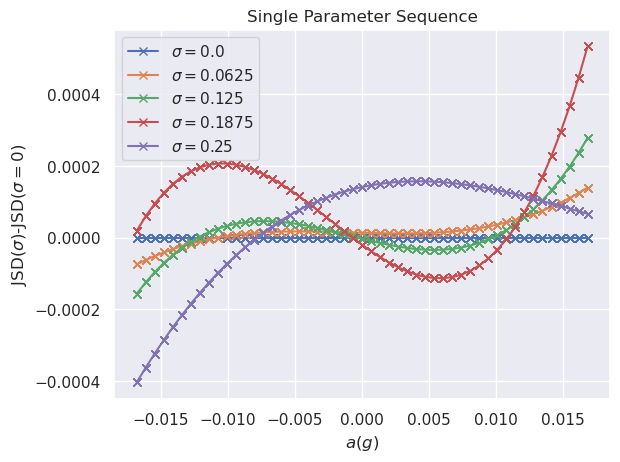

In [8]:
datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic4.txt");
datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==0];
x0= data_select[:,2]*Units.accUnit/Units.g;
y0=data_select[:,1];
p0=np.polyfit(x0,y0,deg=3);
y0=p0[0]*x0**3+p0[1]*x0**2+p0[2]*x0+p0[3];

for i in range( len(sigma) ):
    data_select=datanew[datanew[:,0]==sigma[i]];
    x=data_select[:,2]*Units.accUnit/Units.g; y= data_select[:,1];
    p=np.polyfit(x,y,deg=3)
    plt.plot(x, p[0]*x**3+p[1]*x**2+p[2]*x+p[3]-y0,'x-',label="$\sigma=$"+str(sigma[i]));

plt.xlabel("$a(g)$"); plt.ylabel("JSD($\sigma$)-JSD($\sigma=0$)");
plt.title("Single Parameter Sequence");
# datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic.txt");
# datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

# sigma=np.unique(datanew[:,0])
# sigma=np.unique(datanew[:,0])
# for i in range( len(sigma) ):
#     data_select=datanew[datanew[:,0]==sigma[i]];
#     plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], 'x',label="SP + "+str(sigma[i]));

plt.legend()

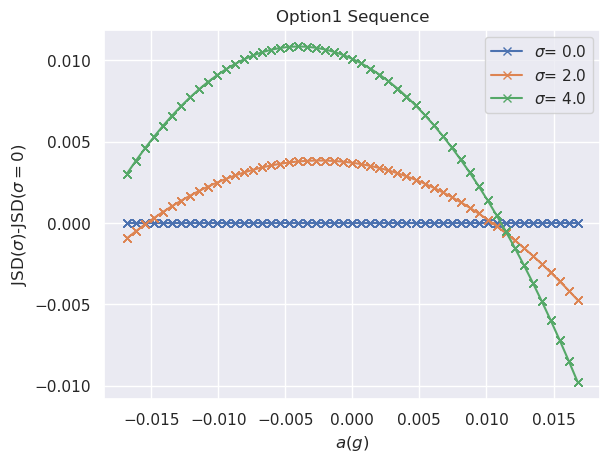

In [71]:
datafile_OP = np.loadtxt("../test_jitter_updated/jitter_option1_diagnostic.txt");
datanew  = datafile_OP[ np.lexsort((datafile_OP[:,2],datafile_OP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==0];
x0= data_select[:,2]*Units.accUnit/Units.g;
y0=data_select[:,1];
p0=np.polyfit(x0,y0,deg=2);
y0=p0[0]*x0**2+p0[1]*x0+p0[2];

for i in range( len(sigma) ):
    data_select=datanew[datanew[:,0]==sigma[i]];
    x=data_select[:,2]*Units.accUnit/Units.g; y= data_select[:,1];
    p=np.polyfit(x,y,deg=2)
    plt.plot(x, p[0]*x**2+p[1]*x+p[2]-y0,'x-',label="$\sigma$= "+str(sigma[i]));

plt.xlabel("$a(g)$"); plt.ylabel("JSD($\sigma$)-JSD($\sigma=0$)");
plt.title("Option1 Sequence");

# datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic.txt");
# datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

# sigma=np.unique(datanew[:,0])
# sigma=np.unique(datanew[:,0])
# for i in range( len(sigma) ):
#     data_select=datanew[datanew[:,0]==sigma[i]];
#     plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], 'x',label="SP + "+str(sigma[i]));

plt.legend()

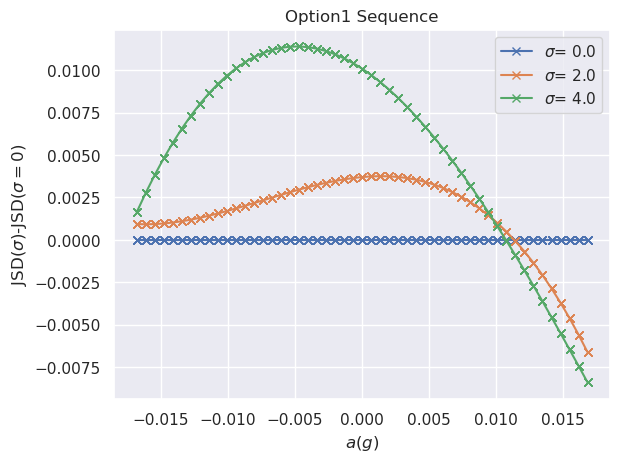

In [81]:
datafile_OP = np.loadtxt("../test_jitter_updated/jitter_option1_diagnostic.txt");
datanew  = datafile_OP[ np.lexsort((datafile_OP[:,2],datafile_OP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==0];
x0= data_select[:,2]*Units.accUnit/Units.g;
y0=data_select[:,1];
p0=np.polyfit(x0,y0,deg=3);
y0=p0[0]*x0**3+p0[1]*x0**2+p0[2]*x+p0[3];

for i in range( len(sigma) ):
    data_select=datanew[datanew[:,0]==sigma[i]];
    x=data_select[:,2]*Units.accUnit/Units.g; y= data_select[:,1];
    p=np.polyfit(x,y,deg=3)
    plt.plot(x, p[0]*x**3+p[1]*x**2+p[2]*x+p[3]-y0,'x-',label="$\sigma$= "+str(sigma[i]));

plt.xlabel("$a(g)$"); plt.ylabel("JSD($\sigma$)-JSD($\sigma=0$)");
plt.title("Option1 Sequence");

# datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic.txt");
# datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

# sigma=np.unique(datanew[:,0])
# sigma=np.unique(datanew[:,0])
# for i in range( len(sigma) ):
#     data_select=datanew[datanew[:,0]==sigma[i]];
#     plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], 'x',label="SP + "+str(sigma[i]));

plt.legend()

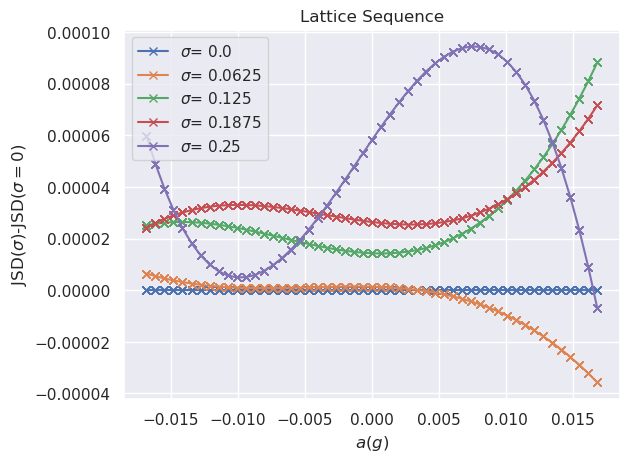

In [9]:
datafile_L = np.loadtxt("../test_jitter_updated/jitter_latt_diagnostic.txt");
datanew  = datafile_L[ np.lexsort((datafile_L[:,2],datafile_L[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==0];
x0= data_select[:,2]*Units.accUnit/Units.g;
y0=data_select[:,1];
p0=np.polyfit(x0,y0,deg=3);
y0=p0[0]*x0**3+p0[1]*x0**2+p0[2]*x+p0[3];

for i in range( len(sigma) ):
    data_select=datanew[datanew[:,0]==sigma[i]];
    x=data_select[:,2]*Units.accUnit/Units.g; y= data_select[:,1];
    p=np.polyfit(x,y,deg=3)
    plt.plot(x, p[0]*x**3+p[1]*x**2+p[2]*x+p[3]-y0,'x-',label="$\sigma$= "+str(sigma[i]));

plt.xlabel("$a(g)$"); plt.ylabel("JSD($\sigma$)-JSD($\sigma=0$)");
plt.title("Lattice Sequence");

# datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic.txt");
# datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

# sigma=np.unique(datanew[:,0])
# sigma=np.unique(datanew[:,0])
# for i in range( len(sigma) ):
#     data_select=datanew[datanew[:,0]==sigma[i]];
#     plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], 'x',label="SP + "+str(sigma[i]));

plt.legend()

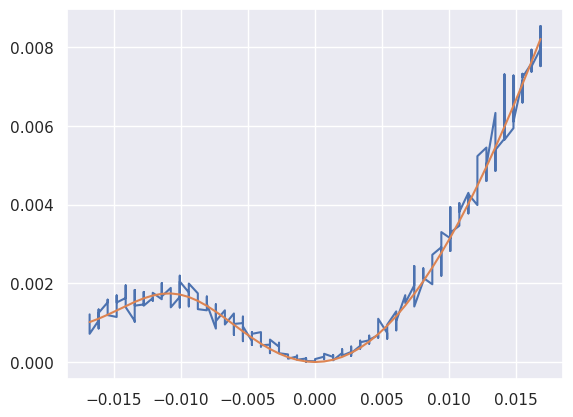

In [10]:
datafile_MP = np.loadtxt("../test_jitter_updated/jitter_latt_diagnostic.txt");
datanew  = datafile_MP[ np.lexsort((datafile_MP[:,2],datafile_MP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==sigma[-1]];
plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], label="latt");
sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==sigma[0]];
plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], label="latt_base");



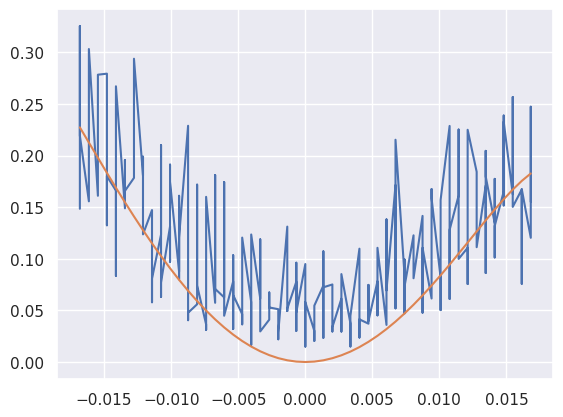

In [88]:
datafile_MP = np.loadtxt("../test_jitter_updated/jitter_MP_diagnostic3.txt");
datanew  = datafile_MP[ np.lexsort((datafile_MP[:,2],datafile_MP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==sigma[-1]];
plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], label="MP");
sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==sigma[0]];
plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], label="MP_base");



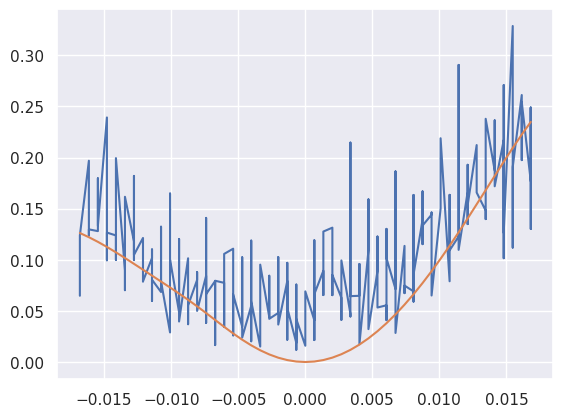

In [89]:
datafile_SP = np.loadtxt("../test_jitter_updated/jitter_SP_diagnostic3.txt");
datanew  = datafile_SP[ np.lexsort((datafile_SP[:,2],datafile_SP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==sigma[-1]];
plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], label="SP");
sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==sigma[0]];
plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], label="SP_base");

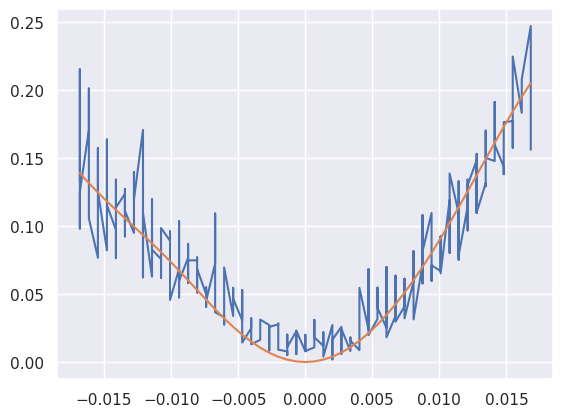

In [75]:
datafile_OP = np.loadtxt("../test_jitter_updated/jitter_option1_diagnostic.txt");
datanew  = datafile_OP[ np.lexsort((datafile_OP[:,2],datafile_OP[:,0])) ]

sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==sigma[-1]];
plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], label="SP");
sigma=np.unique(datanew[:,0])
data_select=datanew[datanew[:,0]==sigma[0]];
plt.plot(data_select[:,2]*Units.accUnit/Units.g, data_select[:,1], label="SP_base");